In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as pltf

In [2]:
df = pd.read_csv("grid.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'grid.csv'

In [ ]:
df

In [ ]:
df = pd.get_dummies(df, drop_first = True, columns = ['Weather Condition'])

In [ ]:
df = df.dropna()

In [3]:
df.isnull().sum()

NameError: name 'df' is not defined

In [4]:
min_long = min(df['X'])
max_long = max(df['X'])
min_lat = min(df['Y'])
max_lat = max(df['Y'])

NameError: name 'df' is not defined

In [5]:
print(min_long ,max_long ,min_lat ,max_lat )

NameError: name 'min_long' is not defined

In [74]:

(max_long - min_long)*69

17.802945990000012

In [75]:
(max_lat - min_lat)*69

29.148505590000397

Each degree long and lat is approximately 69 miles. Hence if we multiply the difference in latitudes and longitudes with 69 we can get the approximate area of Attleboro that we are scanning in this mnodel. The results conclude that area in concern stretches approx 29 miles horizontally and 18 miles vertically. We can decide what area of block in grid needed to be considered for this analysis. We can set rows and columns according to that. 

In [76]:
bottomLeft = (min_long, min_lat)
bottomRight = (max_long, min_lat)
topLeft = (min_long,max_lat)
topRight = (max_long,max_lat)

In [98]:
def grid_labels(row,col):
    #assigning rows and columns to the entire Attleboro town by dividing it into a grid 
    cols = np.linspace(bottomLeft[0], bottomRight[0], num=col)
    rows = np.linspace(bottomLeft[1], topLeft[1], num=row)
    df['col'] = np.searchsorted(cols, df['X'])
    df['row'] = np.searchsorted(rows, df['Y'])
    #calculating the mid-point(centroid) of each chunk of the grid
    c = list(range(1,col+1))
    r = list(range(1,row+1))
    x = min_long+((max_long-min_long)/(2*col))
    y = min_lat+((max_lat-min_lat)/(2*row))
    my = min_lat+((max_lat-min_lat)/(2*row))
    long_diff = (max_long-min_long)/col
    lat_diff = (max_lat-min_lat)/row
    tick = 1
    midx = []
    midy = []
    col = []
    row = []
    block = []
    data = []
    for n in c:
        y = my
        for m in r:
            midx.append(x)
            midy.append(y)
            y+=lat_diff
            col.append(n)
            row.append(m)
            block.append(tick)
            tick+=1
        x+=long_diff
        #creating a new table 'data' that includes row number, column number, block number, and respective mid-point
    data.append(col)
    data.append(row)
    data.append(block)
    data.append(midx)
    data.append(midy)
    df2 = pd.DataFrame(data).transpose()
    df2.columns=['col', 'row','block', 'MP_X', 'MP_Y']
    #merging table 'data' with actual datase to assign block number to each accident that had occurred
    grid = pd.merge(df,df2, how = 'left')
    grid['mid_point'] = list(zip(grid['MP_X'],grid['MP_Y']))
    return grid

In [99]:
info = grid_labels(60,36)
info

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Weather Condition_Cloudy/Rain,Weather Condition_Fog,Weather Condition_Rain,Weather Condition_Snow,col,row,block,MP_X,MP_Y,mid_point
0,1/2/2002,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,0,0,1,0,7,10,190.0,-71.288112,41.945584,"(-71.28811214250003, 41.94558406483332)"
1,1/2/2002,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,0,0,0,0,8,9,219.0,-71.273778,41.931503,"(-71.27377804750003, 41.931502661166654)"
2,1/2/2002,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,0,0,0,0,6,9,159.0,-71.302446,41.931503,"(-71.30244623750002, 41.931502661166654)"
3,1/3/2002,9:35 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,2,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,0,0,0,0,6,8,158.0,-71.302446,41.917421,"(-71.30244623750002, 41.91742125749999)"
4,1/3/2002,4:37 PM,Not Reported,Not Applicable,2,0,0,Angle,V1: Entering traffic lane / V2: Slowing or sto...,V1: N / V2: N,...,0,0,0,0,8,10,220.0,-71.273778,41.945584,"(-71.27377804750003, 41.94558406483332)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19538,11/30/2021,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,0,0,0,0,5,9,129.0,-71.316780,41.931503,"(-71.31678033250002, 41.931502661166654)"
19539,11/30/2021,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,0,0,0,0,6,10,160.0,-71.302446,41.945584,"(-71.30244623750002, 41.94558406483332)"
19540,11/30/2021,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,0,0,0,0,6,8,158.0,-71.302446,41.917421,"(-71.30244623750002, 41.91742125749999)"
19541,1/23/2022,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,0,0,0,0,7,9,189.0,-71.288112,41.931503,"(-71.28811214250003, 41.931502661166654)"


In [100]:
info = info.dropna()

In [101]:
info['block'] = info['block'].astype('category')

<ipython-input-101-21dd6bdf12ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['block'] = info['block'].astype('category')


In [107]:
pd.set_option('display.max.rows', None)
info['block'].value_counts()

190.0    2651
38.0     2253
37.0     2112
189.0    1681
159.0    1299
129.0     874
220.0     867
161.0     855
6.0       785
160.0     750
99.0      686
219.0     460
7.0       412
36.0      346
68.0      271
250.0     201
67.0      195
127.0     194
130.0     190
158.0     184
128.0     184
188.0     175
97.0      167
39.0      166
248.0     162
191.0     149
98.0      144
8.0       143
249.0     120
187.0     101
247.0      96
157.0      92
217.0      88
308.0      76
278.0      69
69.0       66
221.0      44
66.0       42
162.0      36
192.0      34
218.0      28
309.0      20
251.0      15
280.0      15
70.0        6
279.0       6
131.0       5
222.0       4
307.0       4
100.0       3
277.0       3
315.0       2
255.0       2
285.0       1
163.0       1
93.0        1
343.0       1
369.0       1
389.0       1
478.0       1
491.0       1
Name: block, dtype: int64

In [103]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19541 entries, 0 to 19542
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   DATE                              19541 non-null  object  
 1   Crash Time                        19541 non-null  object  
 2   Crash Severity                    19541 non-null  object  
 3   Maximum Injury Severity Reported  19541 non-null  object  
 4   Number of Vehicles                19541 non-null  int64   
 5   Total Nonfatal Injuries           19541 non-null  int64   
 6   Total Fatal Injuries              19541 non-null  int64   
 7   Manner of Collision               19541 non-null  object  
 8   Vehicle Action Prior to Crash     19541 non-null  object  
 9   Vehicle Travel Directions         19541 non-null  object  
 10  Road Surface Condition            19541 non-null  object  
 11  Ambient Light                     19541 non-null  obje

C:\Users\khurr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khurr\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\khurr\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='block', ylabel='count'>

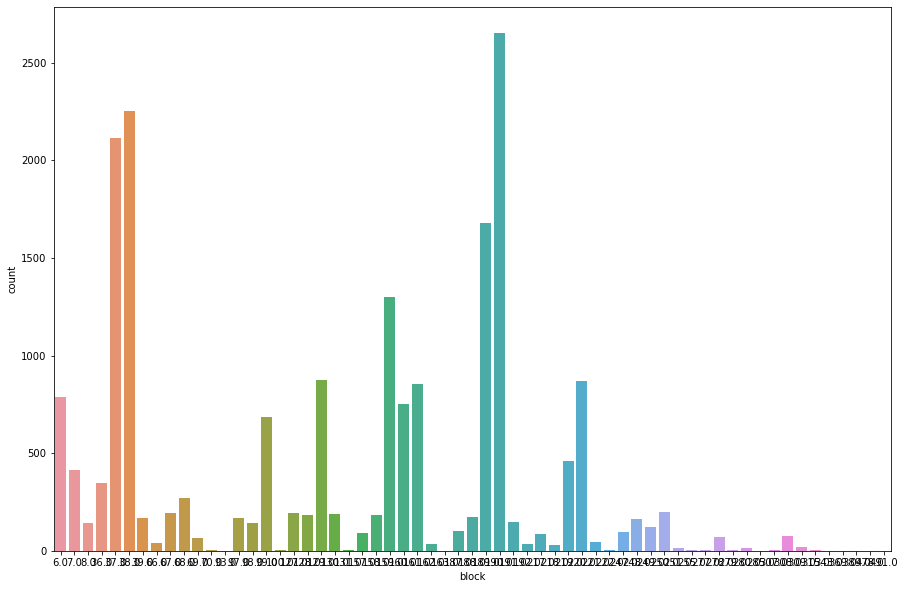

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(info['block'])

In [105]:
mid_point=info[info['block']==35]['mid_point']
mid_point

Series([], Name: mid_point, dtype: object)

pip install folium

In [106]:
from folium import Map
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [86]:
for_map = Map(location=[np.mean(info['MP_Y']), np.mean(info['MP_X'])], zoom_start=8, )

In [87]:
hm_wide = HeatMap(data = info[['MP_Y','MP_X']], 
                  min_opacity=0.2,
                  radius=17, 
                  blur=15, 
                  max_zoom=5,
)

In [88]:
for_map.add_child(hm_wide)

# Import module
from geopy.geocoders import Nominatim
 
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# Assign Latitude & Longitude
Latitude = str(mid_point[0][1])
Longitude = str(mid_point[0][0])
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
 
# Get location with geocode
location = geolocator.geocode(Latitude+","+Longitude)
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location)

column=set(info[info['block']==59]['col'])
row=set(info[info['block']==59]['row'])
mid_point=set(info[info['block']==59]['mid_point'])


# DECISION TREE

In [89]:
X = info[['Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain', 'Weather Condition_Fog',
       'Weather Condition_Rain', 'Weather Condition_Snow','SNOW',
       'PRCP','PRCP-1','PRCP-2','TMAX','TMAX-1','TMAX-2','TMIN','TMIN-1','TMIN-2', 'Ice']]
y = info[['block']]

In [90]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 899) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

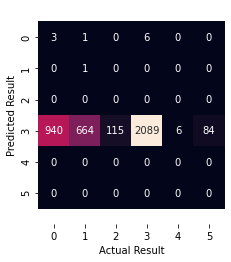

In [91]:
%matplotlib inline
mat = confusion_matrix(dtree_predictions, y_test)
sns.heatmap(mat, fmt='g',square=True, annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show() 

In [92]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.5354310565361985


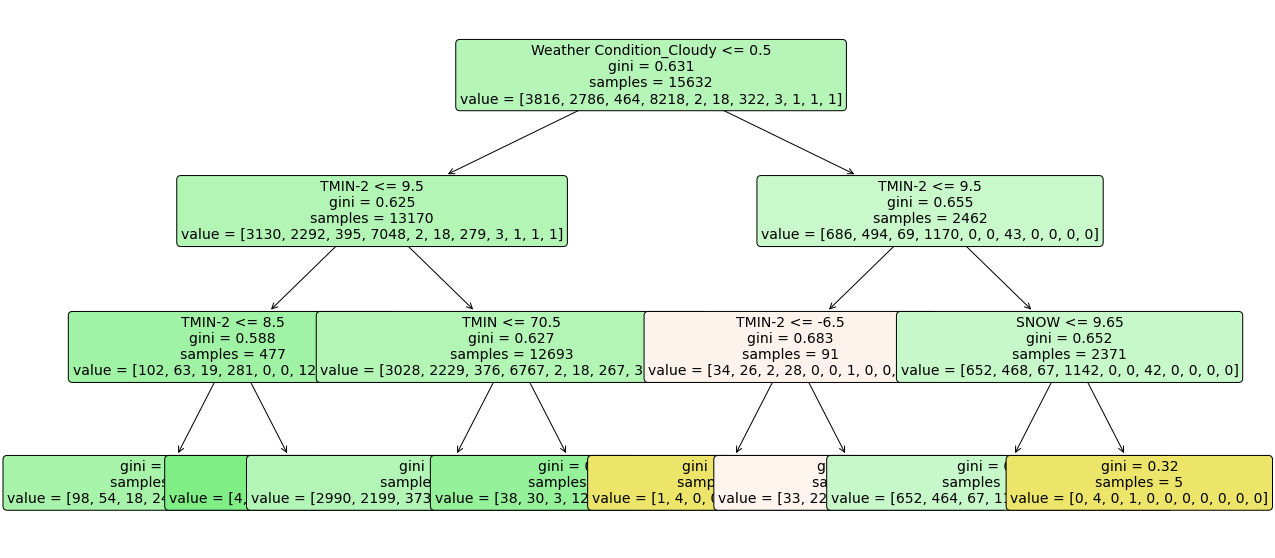

In [93]:
fn = ['Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain', 'Weather Condition_Fog',
       'Weather Condition_Rain', 'Weather Condition_Snow','SNOW',
       'PRCP','PRCP-1','PRCP-2','TMAX','TMAX-1','TMAX-2','TMIN','TMIN-1','TMIN-2', 'Ice']
plt.figure(figsize=(20,10))
a = plot_tree(dtree_model, 
              feature_names=fn,
              max_depth=3,
              filled=True, 
              rounded=True, 
              fontsize=14)

# KNN

In [94]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 899) 
  
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

C:\Users\khurr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.4304720481002942


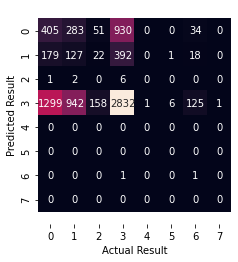

In [95]:
%matplotlib inline
mat = confusion_matrix(knn_predictions, y_test)
sns.heatmap(mat, fmt='g',square=True, annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show() 

In [96]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))

Accuracy: 0.4304720481002942


# NAIVE BAYES

In [97]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 899) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

0.09108353588333121


C:\Users\khurr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


pip install opencv-python

import cv2 as cv  # tested with version 4.5.3.56 (pip install opencv-python)
import numpy as np



def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

pic = Image.open('Attleboro.jpg')

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('Attleboro.jpg')
my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
fig.savefig('myImageGrid.tiff',dpi=my_dpi)
